In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#generate synthetic data
#set a random seed for  reproducibility
np.random.seed(0)

In [3]:
#create a linear relationship with some noise
#x represents independent variable and y represents dependent variable
x=np.linspace(0,5,100).reshape(-1,1) #generate 100 equally speed values between 0 and 5
y=2*x+1+np.random.normal(0,0.5,100).reshape(-1,1) #add noise to the linear relationship

In [4]:
#split the dataset into training and testing sets
#this is  done  to evaluate the model's performance on unseen data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.4,random_state=0)

In [5]:
#define a list of training dataset sizes
train_sizes=[10,80]
outcome=['Overfitting','Right Fit']


training size:10-Train error:0.16,Test error:0.64,model :Overfitting


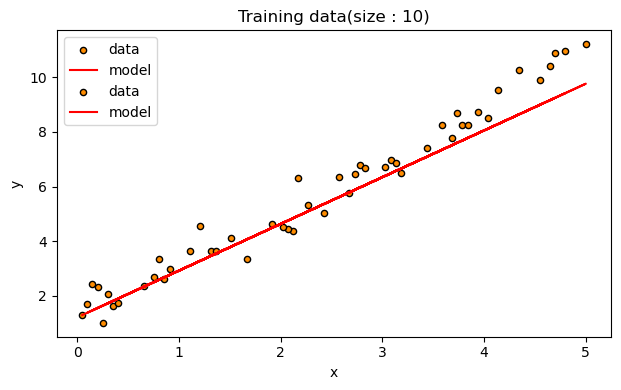

training size:80-Train error:0.26,Test error:0.26,model :Right Fit


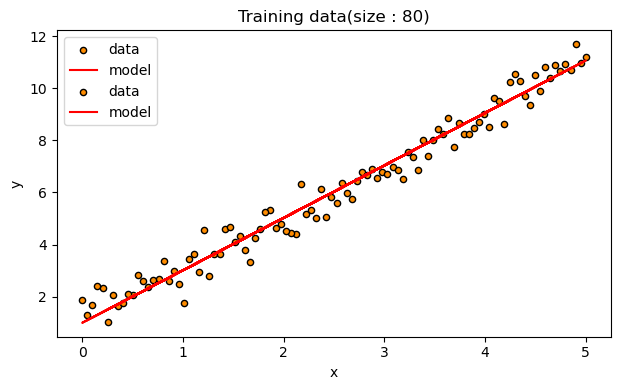

In [7]:
#create a jupyter notebook cell for each training size
for i,train_size in enumerate(train_sizes):
    plt.figure(figsize=(12,4))
    #select a subset of training data based on the specified size
    x_train_subset,y_train_subset=x_train[:train_size],y_train[:train_size]
    #create linear regression model
    model=LinearRegression()
    #fit the model with the subset of training data
    model.fit(x_train_subset,y_train_subset)
    #predict on training data
    y_train_pred=model.predict(x_train_subset)
    #predict on testing data
    y_test_pred=model.predict(x_test)
    #plot the true data and model prediction for the training dataset
    plt.subplot(1,2,1)
    plt.scatter(x_train_subset,y_train_subset,s=20,edgecolor='black',c='darkorange',label='data')
    plt.plot(x_train_subset,y_train_pred,color='red',label='model')
    plt.title(f"Training data(size : {train_size})")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best')
    #plot the true data and model prediction for the testing dataset
    plt.subplot(1,2,1)
    plt.scatter(x_test,y_test,s=20,edgecolor='black',c='darkorange',label='data')
    plt.plot(x_test,y_test_pred,color='red',label='model')
    plt.title(f"Training data(size : {train_size})")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best')
    #calculate and display training and testing error(MSE)
    train_error=mean_squared_error(y_train_subset,y_train_pred)
    test_error=mean_squared_error(y_test,y_test_pred)
    #print training size and associated errors
    print(f"training size:{train_size}-Train error:{train_error:.2f},Test error:{test_error:.2f},model :{outcome[i]}")
    #Adjust layout for better visualisation
    plt.tight_layout()
    #show the plots for the current training size
    plt.show()